In [10]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import joblib
import shap
from catboost import CatBoostClassifier, Pool
import os
from scipy.stats import rankdata

path_dir = os.path.dirname(os.getcwd())

In [11]:
def ranking_array(arr):
    ranks = rankdata(arr)
    descending_ranks = len(arr) - ranks + 1
    return descending_ranks

def shap_to_df (model, data):

    data.drop(data[data['Validation set'] <= 0].index, inplace = True)
    X_data = data.drop(columns=['Outcome'])
    X_data = X_data.drop(columns=['Nr. Ext.'])
    X_data = X_data.drop(columns=['Nr. Int.'])
    X_data = X_data.drop(columns=['CNP'])
    X_data = X_data.drop(columns=['Validation set'])
    X_data = X_data.drop(columns=['Probabilities'])

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_data)
    shap_values_df = pd.DataFrame(shap_values, columns=X_data.columns)
    shap_values_df2=shap_values_df.abs()
    column_sums = shap_values_df2.sum()
    ranks=ranking_array(column_sums)
    return shap_values_df, column_sums, ranks

def positive_shap_to_df (model, data):

    data.drop(data[data['Validation set'] <= 0].index, inplace = True)
    X_data = data.drop(columns=['Outcome'])
    X_data = X_data.drop(columns=['Nr. Ext.'])
    X_data = X_data.drop(columns=['Nr. Int.'])
    X_data = X_data.drop(columns=['CNP'])
    X_data = X_data.drop(columns=['Validation set'])
    X_data = X_data.drop(columns=['Probabilities'])

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_data)
    shap_values_df = pd.DataFrame(shap_values, columns=X_data.columns)
    shap_values_df2 = shap_values_df[shap_values_df > 0]
    column_sums = shap_values_df2.sum()
    ranks=ranking_array(column_sums)
    return shap_values_df, column_sums, ranks

def negative_shap_to_df (model, data):

    data.drop(data[data['Validation set'] <= 0].index, inplace = True)
    X_data = data.drop(columns=['Outcome'])
    X_data = X_data.drop(columns=['Nr. Ext.'])
    X_data = X_data.drop(columns=['Nr. Int.'])
    X_data = X_data.drop(columns=['CNP'])
    X_data = X_data.drop(columns=['Validation set'])
    X_data = X_data.drop(columns=['Probabilities'])

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_data)
    shap_values_df = pd.DataFrame(shap_values, columns=X_data.columns)
    shap_values_df2 = shap_values_df[shap_values_df < 0]
    shap_values_df2=shap_values_df2.abs()
    column_sums = shap_values_df2.sum()
    ranks=ranking_array(column_sums)
    return shap_values_df, column_sums, ranks

### CV cause death most important features

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


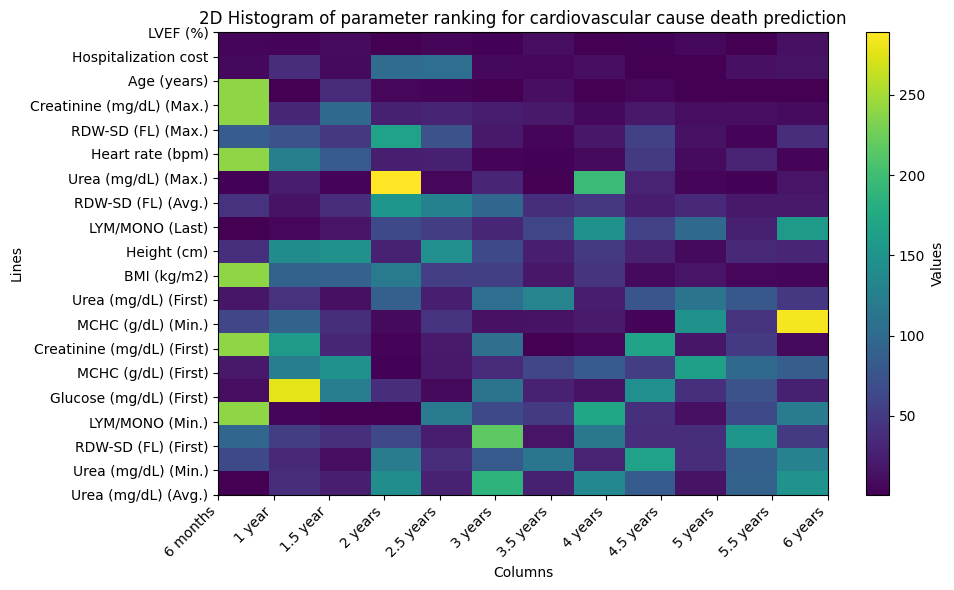

In [12]:
model = joblib.load(os.path.join(path_dir, "cv cause\\0.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\0.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_05y,column_sums_05y,ranks_05y=shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "cv cause\\1y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\1y_trainingtesting_validation_dataframe.csv"))
shap_values_df_1y,column_sums_1y,ranks_1y=shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "cv cause\\1.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\1.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_15y,column_sums_15y,ranks_15y=shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "cv cause\\2y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\2y_trainingtesting_validation_dataframe.csv"))
shap_values_df_2y,column_sums_2y,ranks_2y=shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "cv cause\\2.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\2.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_25y,column_sums_25y,ranks_25y=shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "cv cause\\3y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\3y_trainingtesting_validation_dataframe.csv"))
shap_values_df_3y,column_sums_3y,ranks_3y=shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "cv cause\\3.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\3.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_35y,column_sums_35y,ranks_35y=shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "cv cause\\4y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\4y_trainingtesting_validation_dataframe.csv"))
shap_values_df_4y,column_sums_4y,ranks_4y=shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "cv cause\\4.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\4.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_45y,column_sums_45y,ranks_45y=shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "cv cause\\5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_5y,column_sums_5y,ranks_5y=shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "cv cause\\5.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\5.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_55y,column_sums_55y,ranks_55y=shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "cv cause\\6y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\6y_trainingtesting_validation_dataframe.csv"))
shap_values_df_6y,column_sums_6y,ranks_6y=shap_to_df (model, data)

data2 = {'6 months': ranks_05y, 
        '1 year': ranks_1y, 
        '1.5 year': ranks_15y,
        '2 years': ranks_2y, 
        '2.5 years': ranks_25y, 
        '3 years': ranks_3y,
        '3.5 years': ranks_35y, 
        '4 years': ranks_4y, 
        '4.5 years': ranks_45y,
        '5 years': ranks_5y, 
        '5.5 years': ranks_55y, 
        '6 years': ranks_6y}
df = pd.DataFrame(data2)
data=data.drop(columns=['Outcome'])
data = data.drop(columns=['Nr. Ext.'])
data = data.drop(columns=['Nr. Int.'])
data = data.drop(columns=['CNP'])
data = data.drop(columns=['Validation set'])
data = data.drop(columns=['Probabilities'])

column_names = list(data.columns)
df['Parameter'] = column_names
columns_to_average = ['6 months','1 year','1.5 year','2 years','2.5 years','3 years','3.5 years','4 years','4.5 years','5 years','5.5 years','6 years']
df['Average'] = df[columns_to_average].mean(axis=1)

sorted_df = df.sort_values(by='Average', ascending=True)


# Create a DataFrame
df2 = pd.DataFrame(sorted_df)
df2 = df2.head(20)
df2 = df2.sort_values(by='Average', ascending=False)

# Set the 'Text' column as the index (optional, for cleaner plotting)
df2.set_index('Parameter', inplace=True)

df2=df2.drop(columns=['Average'])

# Get the column names (excluding 'Text') for plotting
column_names = df2.columns.tolist()

# Prepare data for 2D histogram plot
x = np.arange(len(column_names))
y = np.arange(len(df2))
X, Y = np.meshgrid(x, y)
values = df2[column_names].values.flatten()

# Plot the 2D histogram
plt.figure(figsize=(10, 6))
plt.hist2d(X.flatten(), Y.flatten(), weights=values, bins=[len(x), len(y)], cmap='viridis')
plt.colorbar(label='Values')
plt.xticks(x, column_names, rotation=45, ha='right')
plt.yticks(np.arange(len(df2)), df2.index)
plt.xlabel('Columns')
plt.ylabel('Lines')
plt.title('2D Histogram of parameter ranking for cardiovascular cause death prediction')
plt.tight_layout()
plt.show()

### All-cause death most important features

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


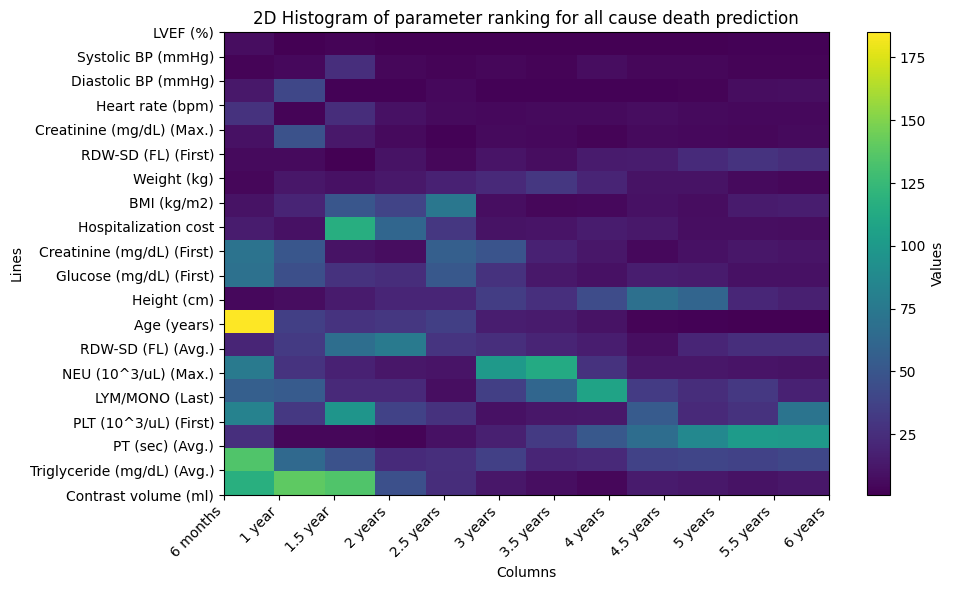

In [13]:
model = joblib.load(os.path.join(path_dir, "all cause\\0.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\0.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_05y,column_sums_05y,ranks_05y=shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "all cause\\1y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\1y_trainingtesting_validation_dataframe.csv"))
shap_values_df_1y,column_sums_1y,ranks_1y=shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "all cause\\1.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\1.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_15y,column_sums_15y,ranks_15y=shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "all cause\\2y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\2y_trainingtesting_validation_dataframe.csv"))
shap_values_df_2y,column_sums_2y,ranks_2y=shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "all cause\\2.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\2.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_25y,column_sums_25y,ranks_25y=shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "all cause\\3y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\3y_trainingtesting_validation_dataframe.csv"))
shap_values_df_3y,column_sums_3y,ranks_3y=shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "all cause\\3.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\3.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_35y,column_sums_35y,ranks_35y=shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "all cause\\4y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\4y_trainingtesting_validation_dataframe.csv"))
shap_values_df_4y,column_sums_4y,ranks_4y=shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "all cause\\4.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\4.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_45y,column_sums_45y,ranks_45y=shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "all cause\\5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_5y,column_sums_5y,ranks_5y=shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "all cause\\5.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\5.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_55y,column_sums_55y,ranks_55y=shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "all cause\\6y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\6y_trainingtesting_validation_dataframe.csv"))
shap_values_df_6y,column_sums_6y,ranks_6y=shap_to_df (model, data)

data2 = {'6 months': ranks_05y, 
        '1 year': ranks_1y, 
        '1.5 year': ranks_15y,
        '2 years': ranks_2y, 
        '2.5 years': ranks_25y, 
        '3 years': ranks_3y,
        '3.5 years': ranks_35y, 
        '4 years': ranks_4y, 
        '4.5 years': ranks_45y,
        '5 years': ranks_5y, 
        '5.5 years': ranks_55y, 
        '6 years': ranks_6y}
df = pd.DataFrame(data2)
data=data.drop(columns=['Outcome'])
data = data.drop(columns=['Nr. Ext.'])
data = data.drop(columns=['Nr. Int.'])
data = data.drop(columns=['CNP'])
data = data.drop(columns=['Validation set'])
data = data.drop(columns=['Probabilities'])

column_names = list(data.columns)
df['Parameter'] = column_names
columns_to_average = ['6 months','1 year','1.5 year','2 years','2.5 years','3 years','3.5 years','4 years','4.5 years','5 years','5.5 years','6 years']
df['Average'] = df[columns_to_average].mean(axis=1)

sorted_df = df.sort_values(by='Average', ascending=True)
#print(sorted_df)
#print(df)

# Create a DataFrame
df2 = pd.DataFrame(sorted_df)
df2 = df2.head(20)
df2 = df2.sort_values(by='Average', ascending=False)

# Set the 'Text' column as the index (optional, for cleaner plotting)
df2.set_index('Parameter', inplace=True)
df2=df2.drop(columns=['Average'])

# Get the column names (excluding 'Text') for plotting
column_names = df2.columns.tolist()

# Prepare data for 2D histogram plot
x = np.arange(len(column_names))
y = np.arange(len(df2))
X, Y = np.meshgrid(x, y)
values = df2[column_names].values.flatten()

# Plot the 2D histogram
plt.figure(figsize=(10, 6))
plt.hist2d(X.flatten(), Y.flatten(), weights=values, bins=[len(x), len(y)], cmap='viridis')
plt.colorbar(label='Values')
plt.xticks(x, column_names, rotation=45, ha='right')
plt.yticks(np.arange(len(df2)), df2.index)
plt.xlabel('Columns')
plt.ylabel('Lines')
plt.title('2D Histogram of parameter ranking for all cause death prediction')
plt.tight_layout()
plt.show()

### CV cause death negative shap (protective factors)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


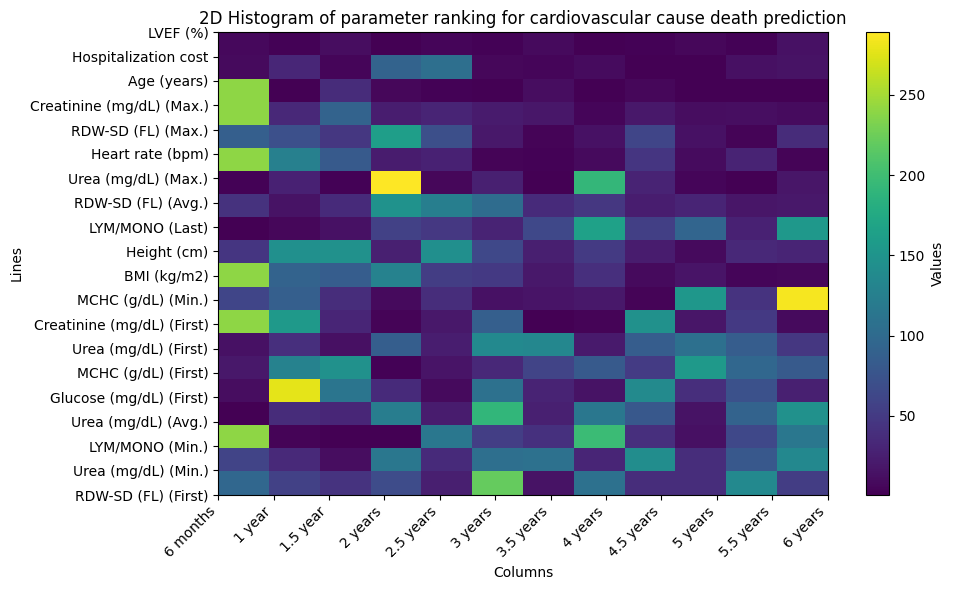

In [14]:
model = joblib.load(os.path.join(path_dir, "cv cause\\0.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\0.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_05y,column_sums_05y,ranks_05y=negative_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "cv cause\\1y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\1y_trainingtesting_validation_dataframe.csv"))
shap_values_df_1y,column_sums_1y,ranks_1y=negative_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "cv cause\\1.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\1.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_15y,column_sums_15y,ranks_15y=negative_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "cv cause\\2y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\2y_trainingtesting_validation_dataframe.csv"))
shap_values_df_2y,column_sums_2y,ranks_2y=negative_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "cv cause\\2.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\2.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_25y,column_sums_25y,ranks_25y=negative_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "cv cause\\3y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\3y_trainingtesting_validation_dataframe.csv"))
shap_values_df_3y,column_sums_3y,ranks_3y=negative_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "cv cause\\3.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\3.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_35y,column_sums_35y,ranks_35y=negative_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "cv cause\\4y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\4y_trainingtesting_validation_dataframe.csv"))
shap_values_df_4y,column_sums_4y,ranks_4y=negative_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "cv cause\\4.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\4.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_45y,column_sums_45y,ranks_45y=negative_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "cv cause\\5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_5y,column_sums_5y,ranks_5y=negative_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "cv cause\\5.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\5.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_55y,column_sums_55y,ranks_55y=negative_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "cv cause\\6y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\6y_trainingtesting_validation_dataframe.csv"))
shap_values_df_6y,column_sums_6y,ranks_6y=negative_shap_to_df (model, data)

data2 = {'6 months': ranks_05y, 
        '1 year': ranks_1y, 
        '1.5 year': ranks_15y,
        '2 years': ranks_2y, 
        '2.5 years': ranks_25y, 
        '3 years': ranks_3y,
        '3.5 years': ranks_35y, 
        '4 years': ranks_4y, 
        '4.5 years': ranks_45y,
        '5 years': ranks_5y, 
        '5.5 years': ranks_55y, 
        '6 years': ranks_6y}
df = pd.DataFrame(data2)
data=data.drop(columns=['Outcome'])
data = data.drop(columns=['Nr. Ext.'])
data = data.drop(columns=['Nr. Int.'])
data = data.drop(columns=['CNP'])
data = data.drop(columns=['Validation set'])
data = data.drop(columns=['Probabilities'])

column_names = list(data.columns)
df['Parameter'] = column_names
columns_to_average = ['6 months','1 year','1.5 year','2 years','2.5 years','3 years','3.5 years','4 years','4.5 years','5 years','5.5 years','6 years']
df['Average'] = df[columns_to_average].mean(axis=1)

sorted_df = df.sort_values(by='Average', ascending=True)
#print(sorted_df)

#print(df)

# Create a DataFrame
df2 = pd.DataFrame(sorted_df)
df2 = df2.head(20)
df2 = df2.sort_values(by='Average', ascending=False)

# Set the 'Text' column as the index (optional, for cleaner plotting)
df2.set_index('Parameter', inplace=True)

df2=df2.drop(columns=['Average'])

# Get the column names (excluding 'Text') for plotting
column_names = df2.columns.tolist()

# Prepare data for 2D histogram plot
x = np.arange(len(column_names))
y = np.arange(len(df2))
X, Y = np.meshgrid(x, y)
values = df2[column_names].values.flatten()

# Plot the 2D histogram
plt.figure(figsize=(10, 6))
plt.hist2d(X.flatten(), Y.flatten(), weights=values, bins=[len(x), len(y)], cmap='viridis')
plt.colorbar(label='Values')
plt.xticks(x, column_names, rotation=45, ha='right')
plt.yticks(np.arange(len(df2)), df2.index)
plt.xlabel('Columns')
plt.ylabel('Lines')
plt.title('2D Histogram of parameter ranking for cardiovascular cause death prediction')
plt.tight_layout()
plt.show()

### All-cause death negative shap (protective factors)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


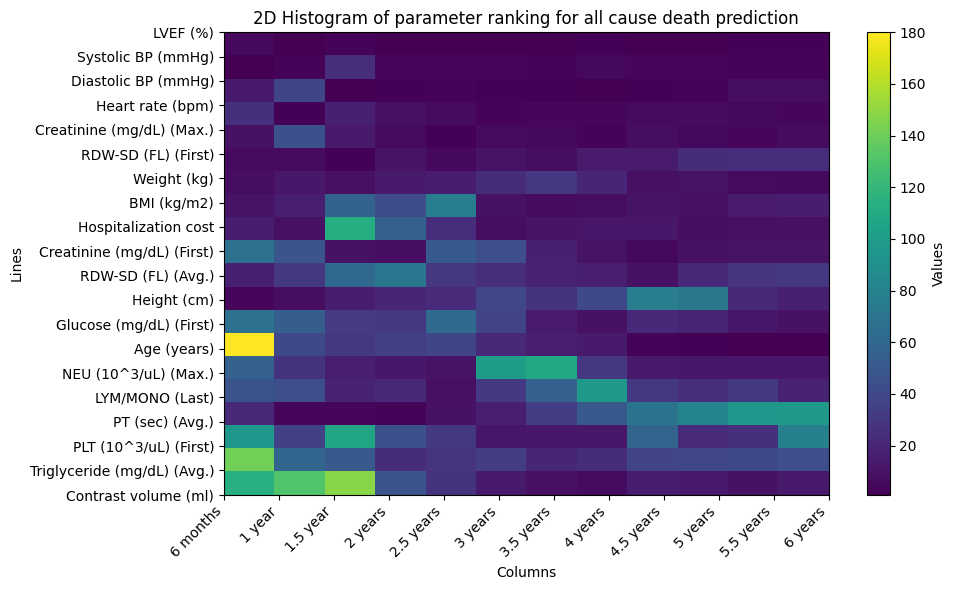

In [15]:
model = joblib.load(os.path.join(path_dir, "all cause\\0.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\0.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_05y,column_sums_05y,ranks_05y=negative_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "all cause\\1y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\1y_trainingtesting_validation_dataframe.csv"))
shap_values_df_1y,column_sums_1y,ranks_1y=negative_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "all cause\\1.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\1.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_15y,column_sums_15y,ranks_15y=negative_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "all cause\\2y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\2y_trainingtesting_validation_dataframe.csv"))
shap_values_df_2y,column_sums_2y,ranks_2y=negative_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "all cause\\2.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\2.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_25y,column_sums_25y,ranks_25y=negative_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "all cause\\3y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\3y_trainingtesting_validation_dataframe.csv"))
shap_values_df_3y,column_sums_3y,ranks_3y=negative_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "all cause\\3.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\3.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_35y,column_sums_35y,ranks_35y=negative_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "all cause\\4y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\4y_trainingtesting_validation_dataframe.csv"))
shap_values_df_4y,column_sums_4y,ranks_4y=negative_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "all cause\\4.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\4.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_45y,column_sums_45y,ranks_45y=negative_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "all cause\\5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_5y,column_sums_5y,ranks_5y=negative_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "all cause\\5.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\5.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_55y,column_sums_55y,ranks_55y=negative_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "all cause\\6y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\6y_trainingtesting_validation_dataframe.csv"))
shap_values_df_6y,column_sums_6y,ranks_6y=negative_shap_to_df (model, data)

data2 = {'6 months': ranks_05y, 
        '1 year': ranks_1y, 
        '1.5 year': ranks_15y,
        '2 years': ranks_2y, 
        '2.5 years': ranks_25y, 
        '3 years': ranks_3y,
        '3.5 years': ranks_35y, 
        '4 years': ranks_4y, 
        '4.5 years': ranks_45y,
        '5 years': ranks_5y, 
        '5.5 years': ranks_55y, 
        '6 years': ranks_6y}
df = pd.DataFrame(data2)
data=data.drop(columns=['Outcome'])
data = data.drop(columns=['Nr. Ext.'])
data = data.drop(columns=['Nr. Int.'])
data = data.drop(columns=['CNP'])
data = data.drop(columns=['Validation set'])
data = data.drop(columns=['Probabilities'])

column_names = list(data.columns)
df['Parameter'] = column_names
columns_to_average = ['6 months','1 year','1.5 year','2 years','2.5 years','3 years','3.5 years','4 years','4.5 years','5 years','5.5 years','6 years']
df['Average'] = df[columns_to_average].mean(axis=1)

sorted_df = df.sort_values(by='Average', ascending=True)
#print(sorted_df)
#print(df)

# Create a DataFrame
df2 = pd.DataFrame(sorted_df)
df2 = df2.head(20)
df2 = df2.sort_values(by='Average', ascending=False)

# Set the 'Text' column as the index (optional, for cleaner plotting)
df2.set_index('Parameter', inplace=True)
df2=df2.drop(columns=['Average'])

# Get the column names (excluding 'Text') for plotting
column_names = df2.columns.tolist()

# Prepare data for 2D histogram plot
x = np.arange(len(column_names))
y = np.arange(len(df2))
X, Y = np.meshgrid(x, y)
values = df2[column_names].values.flatten()

# Plot the 2D histogram
plt.figure(figsize=(10, 6))
plt.hist2d(X.flatten(), Y.flatten(), weights=values, bins=[len(x), len(y)], cmap='viridis')
plt.colorbar(label='Values')
plt.xticks(x, column_names, rotation=45, ha='right')
plt.yticks(np.arange(len(df2)), df2.index)
plt.xlabel('Columns')
plt.ylabel('Lines')
plt.title('2D Histogram of parameter ranking for all cause death prediction')
plt.tight_layout()
plt.show()

### CV cause death positive shap (predisposing factors)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


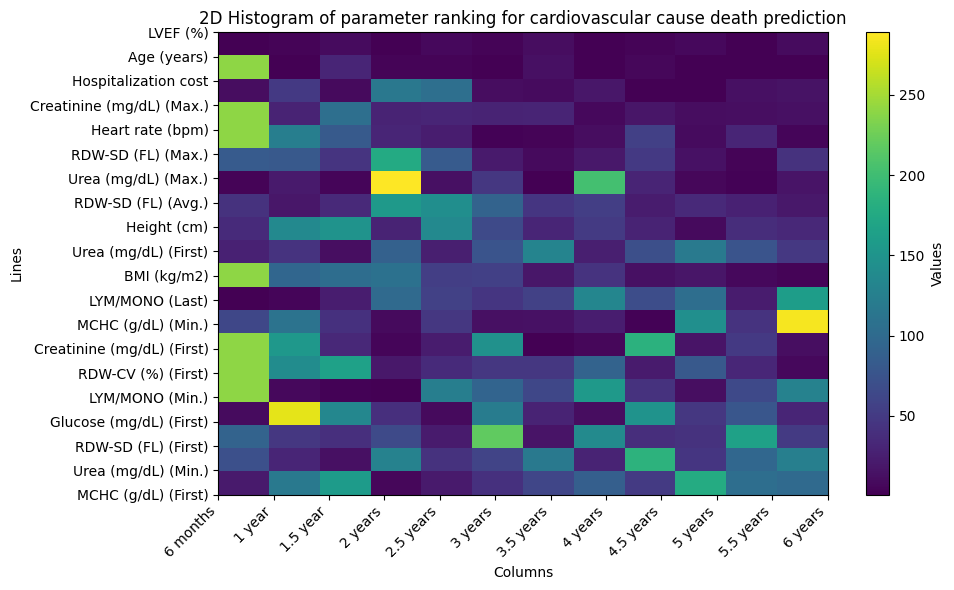

In [16]:
model = joblib.load(os.path.join(path_dir, "cv cause\\0.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\0.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_05y,column_sums_05y,ranks_05y=positive_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "cv cause\\1y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\1y_trainingtesting_validation_dataframe.csv"))
shap_values_df_1y,column_sums_1y,ranks_1y=positive_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "cv cause\\1.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\1.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_15y,column_sums_15y,ranks_15y=positive_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "cv cause\\2y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\2y_trainingtesting_validation_dataframe.csv"))
shap_values_df_2y,column_sums_2y,ranks_2y=positive_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "cv cause\\2.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\2.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_25y,column_sums_25y,ranks_25y=positive_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "cv cause\\3y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\3y_trainingtesting_validation_dataframe.csv"))
shap_values_df_3y,column_sums_3y,ranks_3y=positive_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "cv cause\\3.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\3.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_35y,column_sums_35y,ranks_35y=positive_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "cv cause\\4y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\4y_trainingtesting_validation_dataframe.csv"))
shap_values_df_4y,column_sums_4y,ranks_4y=positive_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "cv cause\\4.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\4.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_45y,column_sums_45y,ranks_45y=positive_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "cv cause\\5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_5y,column_sums_5y,ranks_5y=positive_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "cv cause\\5.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\5.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_55y,column_sums_55y,ranks_55y=positive_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "cv cause\\6y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "cv cause\\6y_trainingtesting_validation_dataframe.csv"))
shap_values_df_6y,column_sums_6y,ranks_6y=positive_shap_to_df (model, data)

data2 = {'6 months': ranks_05y, 
        '1 year': ranks_1y, 
        '1.5 year': ranks_15y,
        '2 years': ranks_2y, 
        '2.5 years': ranks_25y, 
        '3 years': ranks_3y,
        '3.5 years': ranks_35y, 
        '4 years': ranks_4y, 
        '4.5 years': ranks_45y,
        '5 years': ranks_5y, 
        '5.5 years': ranks_55y, 
        '6 years': ranks_6y}
df = pd.DataFrame(data2)
data=data.drop(columns=['Outcome'])
data = data.drop(columns=['Nr. Ext.'])
data = data.drop(columns=['Nr. Int.'])
data = data.drop(columns=['CNP'])
data = data.drop(columns=['Validation set'])
data = data.drop(columns=['Probabilities'])

column_names = list(data.columns)
df['Parameter'] = column_names
columns_to_average = ['6 months','1 year','1.5 year','2 years','2.5 years','3 years','3.5 years','4 years','4.5 years','5 years','5.5 years','6 years']
df['Average'] = df[columns_to_average].mean(axis=1)

sorted_df = df.sort_values(by='Average', ascending=True)
#print(sorted_df)

#print(df)

# Create a DataFrame
df2 = pd.DataFrame(sorted_df)
df2 = df2.head(20)
df2 = df2.sort_values(by='Average', ascending=False)

# Set the 'Text' column as the index (optional, for cleaner plotting)
df2.set_index('Parameter', inplace=True)

df2=df2.drop(columns=['Average'])

# Get the column names (excluding 'Text') for plotting
column_names = df2.columns.tolist()

# Prepare data for 2D histogram plot
x = np.arange(len(column_names))
y = np.arange(len(df2))
X, Y = np.meshgrid(x, y)
values = df2[column_names].values.flatten()

# Plot the 2D histogram
plt.figure(figsize=(10, 6))
plt.hist2d(X.flatten(), Y.flatten(), weights=values, bins=[len(x), len(y)], cmap='viridis')
plt.colorbar(label='Values')
plt.xticks(x, column_names, rotation=45, ha='right')
plt.yticks(np.arange(len(df2)), df2.index)
plt.xlabel('Columns')
plt.ylabel('Lines')
plt.title('2D Histogram of parameter ranking for cardiovascular cause death prediction')
plt.tight_layout()
plt.show()

### All cause death positive shap (predisposing factors)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


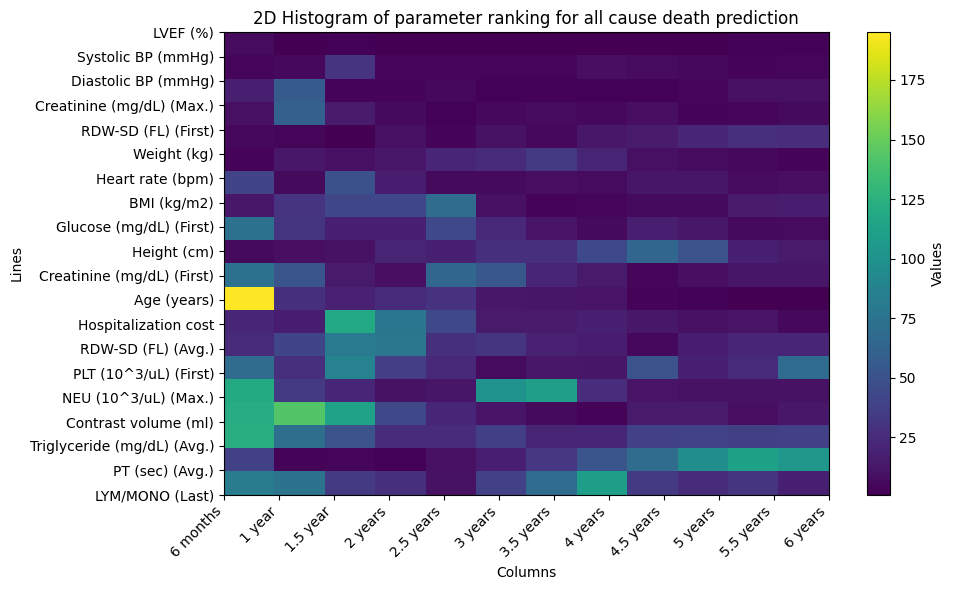

In [17]:
model = joblib.load(os.path.join(path_dir, "all cause\\0.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\0.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_05y,column_sums_05y,ranks_05y=positive_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "all cause\\1y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\1y_trainingtesting_validation_dataframe.csv"))
shap_values_df_1y,column_sums_1y,ranks_1y=positive_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "all cause\\1.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\1.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_15y,column_sums_15y,ranks_15y=positive_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "all cause\\2y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\2y_trainingtesting_validation_dataframe.csv"))
shap_values_df_2y,column_sums_2y,ranks_2y=positive_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "all cause\\2.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\2.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_25y,column_sums_25y,ranks_25y=positive_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "all cause\\3y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\3y_trainingtesting_validation_dataframe.csv"))
shap_values_df_3y,column_sums_3y,ranks_3y=positive_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "all cause\\3.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\3.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_35y,column_sums_35y,ranks_35y=positive_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "all cause\\4y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\4y_trainingtesting_validation_dataframe.csv"))
shap_values_df_4y,column_sums_4y,ranks_4y=positive_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "all cause\\4.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\4.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_45y,column_sums_45y,ranks_45y=positive_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "all cause\\5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_5y,column_sums_5y,ranks_5y=positive_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "all cause\\5.5y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\5.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_55y,column_sums_55y,ranks_55y=positive_shap_to_df (model, data)

model = joblib.load(os.path.join(path_dir, "all cause\\6y_model.pkl"))
data = pd.read_csv(os.path.join(path_dir, "all cause\\6y_trainingtesting_validation_dataframe.csv"))
shap_values_df_6y,column_sums_6y,ranks_6y=positive_shap_to_df (model, data)

data2 = {'6 months': ranks_05y, 
        '1 year': ranks_1y, 
        '1.5 year': ranks_15y,
        '2 years': ranks_2y, 
        '2.5 years': ranks_25y, 
        '3 years': ranks_3y,
        '3.5 years': ranks_35y, 
        '4 years': ranks_4y, 
        '4.5 years': ranks_45y,
        '5 years': ranks_5y, 
        '5.5 years': ranks_55y, 
        '6 years': ranks_6y}
df = pd.DataFrame(data2)
data=data.drop(columns=['Outcome'])
data = data.drop(columns=['Nr. Ext.'])
data = data.drop(columns=['Nr. Int.'])
data = data.drop(columns=['CNP'])
data = data.drop(columns=['Validation set'])
data = data.drop(columns=['Probabilities'])

column_names = list(data.columns)
df['Parameter'] = column_names
columns_to_average = ['6 months','1 year','1.5 year','2 years','2.5 years','3 years','3.5 years','4 years','4.5 years','5 years','5.5 years','6 years']
df['Average'] = df[columns_to_average].mean(axis=1)

sorted_df = df.sort_values(by='Average', ascending=True)
#print(sorted_df)
#print(df)

# Create a DataFrame
df2 = pd.DataFrame(sorted_df)
df2 = df2.head(20)
df2 = df2.sort_values(by='Average', ascending=False)

# Set the 'Text' column as the index (optional, for cleaner plotting)
df2.set_index('Parameter', inplace=True)
df2=df2.drop(columns=['Average'])

# Get the column names (excluding 'Text') for plotting
column_names = df2.columns.tolist()

# Prepare data for 2D histogram plot
x = np.arange(len(column_names))
y = np.arange(len(df2))
X, Y = np.meshgrid(x, y)
values = df2[column_names].values.flatten()

# Plot the 2D histogram
plt.figure(figsize=(10, 6))
plt.hist2d(X.flatten(), Y.flatten(), weights=values, bins=[len(x), len(y)], cmap='viridis')
plt.colorbar(label='Values')
plt.xticks(x, column_names, rotation=45, ha='right')
plt.yticks(np.arange(len(df2)), df2.index)
plt.xlabel('Columns')
plt.ylabel('Lines')
plt.title('2D Histogram of parameter ranking for all cause death prediction')
plt.tight_layout()
plt.show()